In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path319 = 'A319_final.pkl'
file_path320 = 'A320_final.pkl'
file_path321 = 'A321_final.pkl'
file_path332 = 'A332_final.pkl'

df319 = pd.read_pickle(file_path319)
df320 = pd.read_pickle(file_path320)
df321 = pd.read_pickle(file_path321)
df332 = pd.read_pickle(file_path332)

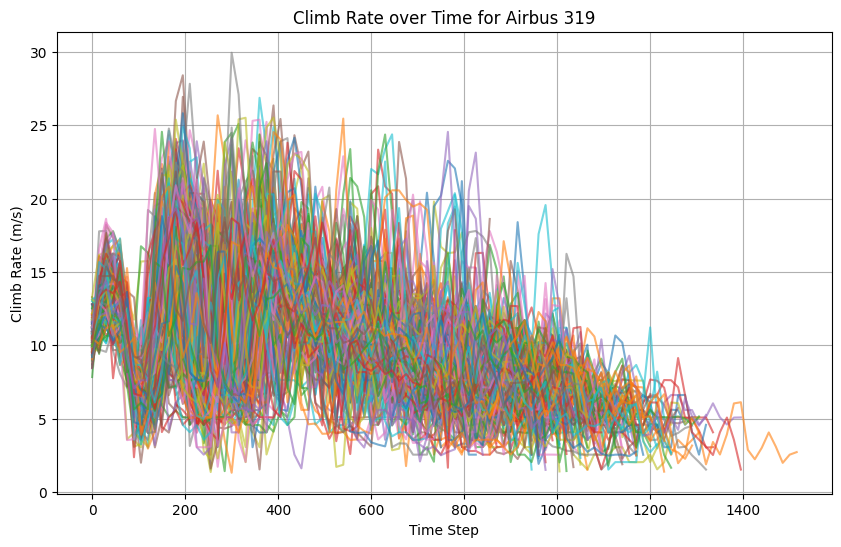

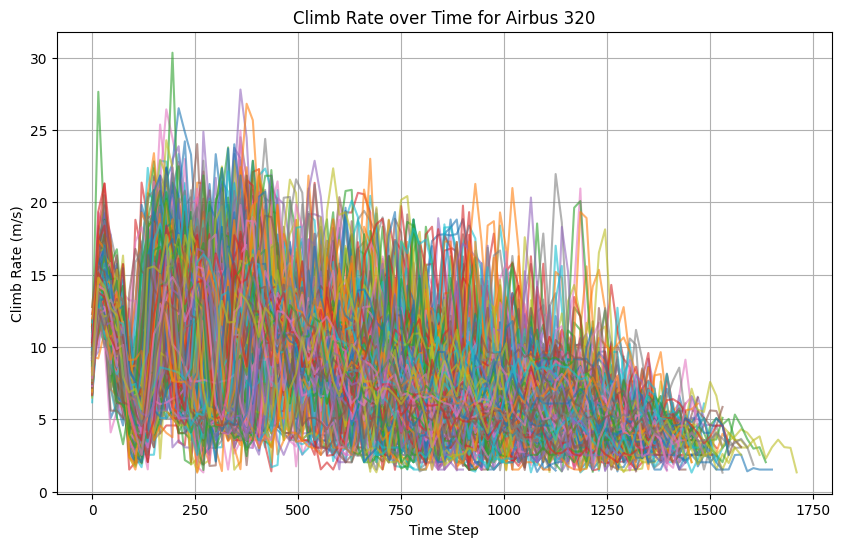

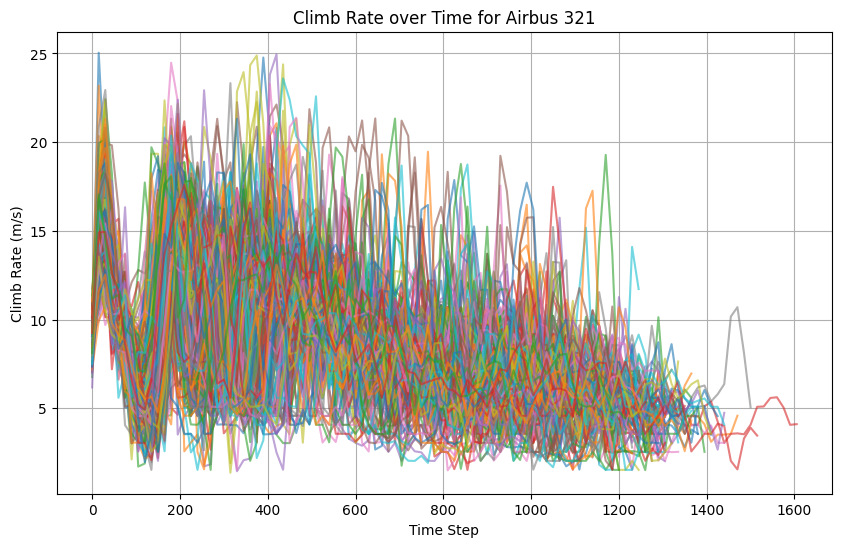

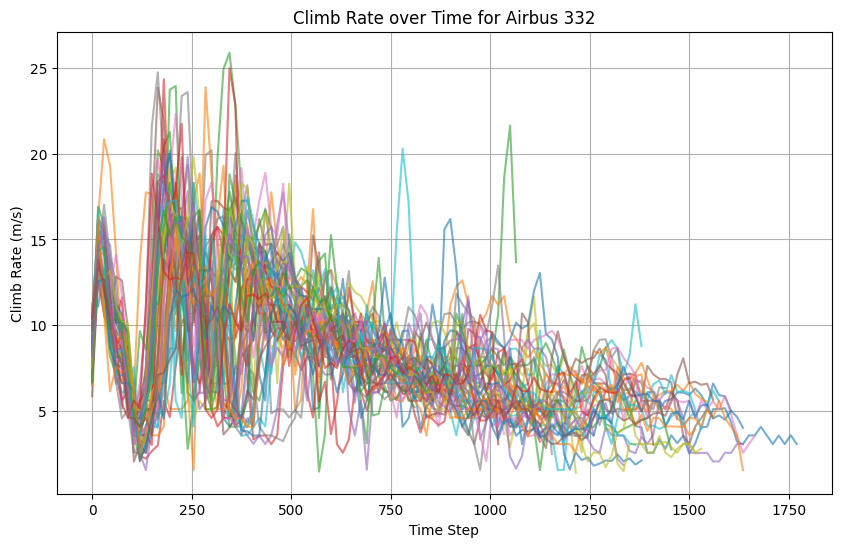

In [2]:
# Function to plot climb rate over time
def plot_climb_rate(df, aircraft_model):
    plt.figure(figsize=(10, 6))
    # Calculate the climb rate
    df['climb_rate'] = df['baroaltitude'].diff() / df['timestep'].diff()  # Calculate climb rate as change in altitude over change in time
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['climb_rate'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Climb Rate over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Climb Rate (m/s)')
    plt.grid(True)
    plt.show()

# Define common x and y limits
# x_limits = (0, 2000)  # Example limits, adjust based on your data
# y_limits = (-5, 15)  # Example limits, adjust as needed to include the full range of your data

# Plot for each aircraft with consistent axis scales
plot_climb_rate(df319, 'Airbus 319')
plot_climb_rate(df320, 'Airbus 320')
plot_climb_rate(df321, 'Airbus 321')
plot_climb_rate(df332, 'Airbus 332')


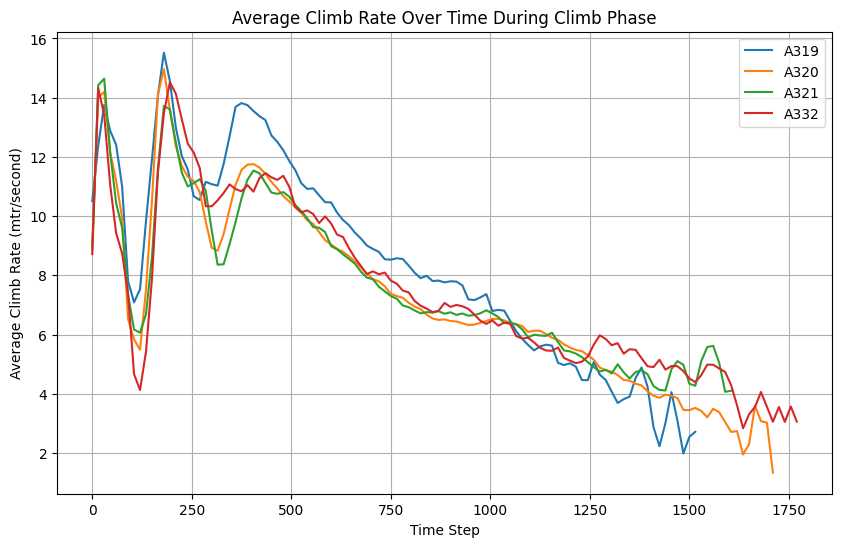

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the .pkl files
base_path = r'C:\Users\malyd\OneDrive - Delft University of Technology\1st year - Q1\TIL6022 TIL Python Programming\Group Project\RQ3'

# Filenames of the .pkl files
filenames = ['A319_final.pkl', 'A320_final.pkl', 'A321_final.pkl', 'A332_final.pkl']
aircraft_data = {}
airplane_models = ['A319', 'A320', 'A321', 'A332']

# Load data from each file
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    # Extract the DataFrame for the current aircraft
    df = aircraft_data[file]
    
    df['climb_rate'] = df['baroaltitude'].diff() / df['timestep'].diff()

    # Calculate average climb rate over time
    average_climb_rate = df.groupby('timestep')['climb_rate'].mean()
    
    # Plotting
    plt.plot(average_climb_rate, label=model.replace('.pkl', ''))  # Clean up model name for the label

plt.title('Average Climb Rate Over Time During Climb Phase')
plt.xlabel('Time Step')
plt.ylabel('Average Climb Rate (mtr/second)')
plt.legend()
plt.grid(True)
plt.show()


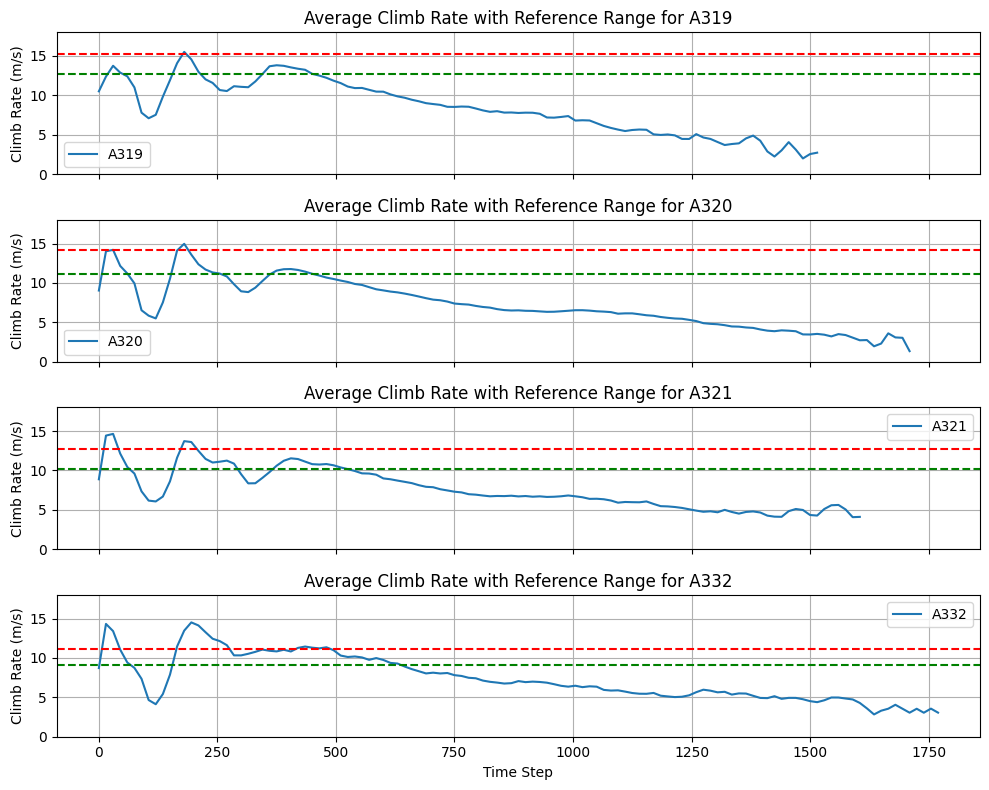

In [6]:
import matplotlib.pyplot as plt

# Assuming the number of models is 4
num_models = len(filenames)

# Example values for A_l and A_u for each model
A_l_values = [12.7, 11.176, 10.16, 9.144]  # Replace these with actual values for each model
A_u_values = [15.24, 14.224, 12.7, 11.176]  # Replace these with actual values for each model

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_models, 1, figsize=(10, 8), sharex=True)

# Process and plot data for each aircraft
for i, (file, model) in enumerate(zip(filenames, airplane_models)):
    # Extract the DataFrame for the current aircraft
    df = aircraft_data[file]
    
    df['climb_rate'] = df['baroaltitude'].diff() / df['timestep'].diff()

    # Calculate average climb rate over time
    average_climb_rate = df.groupby('timestep')['climb_rate'].mean()
    
    # Plotting on the respective subplot
    axes[i].plot(average_climb_rate, label=model.replace('.pkl', ''))  # Clean up model name for the label
    
    # Adding horizontal lines for the range
    axes[i].axhline(y=A_l_values[i], color='green', linestyle='--')
    axes[i].axhline(y=A_u_values[i], color='red', linestyle='--')

    # Set y-axis limits to be the same for all subplots
    axes[i].set_ylim(0, 18)

    # Set title and labels for each subplot
    axes[i].set_title(f'Average Climb Rate with Reference Range for {model.replace(".pkl", "")}')
    axes[i].set_ylabel('Climb Rate (m/s)')
    axes[i].legend()
    axes[i].grid(True)

# Set the common x-label for all subplots
plt.xlabel('Time Step')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


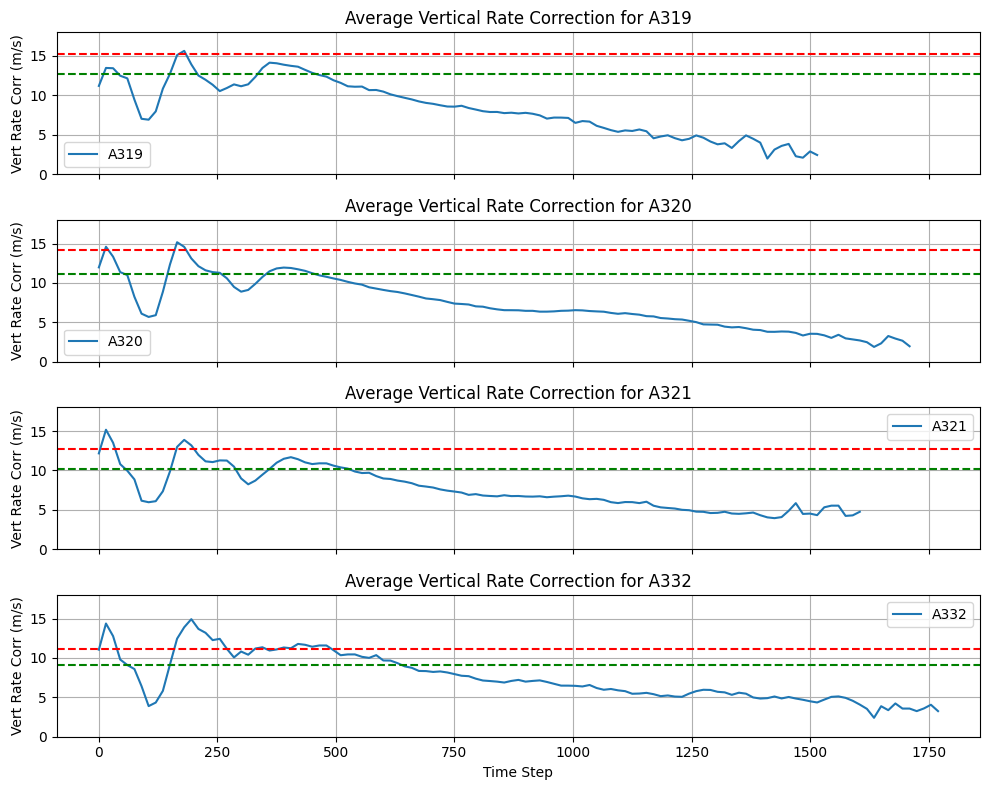

In [8]:
import matplotlib.pyplot as plt

# Assuming the number of models is 4
num_models = len(filenames)

# Example values for A_l and A_u for each model
A_l_values = [12.7, 11.176, 10.16, 9.144]  # Replace these with actual values for each model
A_u_values = [15.24, 14.224, 12.7, 11.176]  # Replace these with actual values for each model

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_models, 1, figsize=(10, 8), sharex=True)

# Process and plot data for each aircraft
for i, (file, model) in enumerate(zip(filenames, airplane_models)):
    # Extract the DataFrame for the current aircraft
    df = aircraft_data[file]

    # Calculate average climb rate over time
    average_ver_rate = df.groupby('timestep')['vertratecorr'].mean()
    
    # Plotting on the respective subplot
    axes[i].plot(average_ver_rate, label=model.replace('.pkl', ''))  # Clean up model name for the label
    
    # Adding horizontal lines for the range
    axes[i].axhline(y=A_l_values[i], color='green', linestyle='--')
    axes[i].axhline(y=A_u_values[i], color='red', linestyle='--')

    # Set y-axis limits to be the same for all subplots
    axes[i].set_ylim(0, 18)

    # Set title and labels for each subplot
    axes[i].set_title(f'Average Vertical Rate Correction for {model.replace(".pkl", "")}')
    axes[i].set_ylabel('Vert Rate Corr (m/s)')
    axes[i].legend()
    axes[i].grid(True)

# Set the common x-label for all subplots
plt.xlabel('Time Step')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
